In [1]:
import re #imports regular expressions
from time import sleep  # for waiting 
from kafka import KafkaConsumer # for fetching the kafka data 
import datetime as dt   # creates timedelta
import matplotlib.pyplot as plt   # for plotting the live graphs and maps
import matplotlib.dates as mdates # plotting the time values
from pymongo import MongoClient  # fetching data from the mongodb
import pprint  # pretty print
import pandas as pd  
import json
import folium
import random
import re
#import folium  # for map plots
import statistics 
import pygeohash as gh

In [2]:
def connect_kafka_consumer():   # kafla consumer with same topis as the kafka producer for climate data
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   #auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

In [3]:
topic = 'Live_data_Taif'
def consume_messages_and_plot(consumer):   #function to consume data and plot the graph
    try:
        %matplotlib notebook
        fig = plt.figure(figsize=(10,5))   #selecting figure size 
        cli = fig.add_subplot(111)          #creating subplots
        plt.ion()                           #for animating the graph 
        plt.title(" Live Data Stream for Taif Weather")
        fig.show()
        fig.canvas.draw()
        x=[]   #empty lists
        y=[]
        for message in consumer:       #for each value in consumer
            cli.clear()                #clear the graph for every iteration
            data = json.loads(message.value.decode('utf-8'))
            
            #import pdb;pdb.set_trace()
            at = data['air_temperature']
            x.append(float(at))     #appending the air Temprature
            y.append(dt.datetime.strptime((re.findall(r"\d\d:\d\d:\d\d",data['observation_date'])[0]),"%H:%M:%S"))
        
        #colorcoding the graph Hot temp (Red) for Warmer (orangr) and comfortable (green) and cold (blue) for low
            
            
            if float(at) >= 32:    
                cli.plot(y,x,color="#FF0000")
            elif float(at)< 32 and float(at) > 23 :
                cli.plot(y,x,color="#ff8164")
            elif float(at)< 23 and float(at) > 15 :
                cli.plot(y,x,color="#6cc15a")
            elif float(at)< 15:
                cli.plot(y,x,color="#3792cb")  
            plt.xlabel("Time")
            plt.ylabel("Temprature")
            #plotting the minimum and maximum values
            if len(x)>=2:
                index = x.index(max(x)) 
                xa = x[index] 
                xb = y[index]
                ma="Max:"+str(max(x))
                cli.annotate(ma,xy=(mdates.date2num(xb), xa))
                index = x.index(min(x)) 
                xa = x[index] 
                xb = y[index]
                mi="Min:"+str(min(x))
                cli.annotate(mi,xy=(mdates.date2num(xb), xa))
            plt.grid(True)
            fig.canvas.draw()
            
            if len(x)>10:
                x.pop(0) # removing the item in the first position
                y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))    

<IPython.core.display.Javascript object>


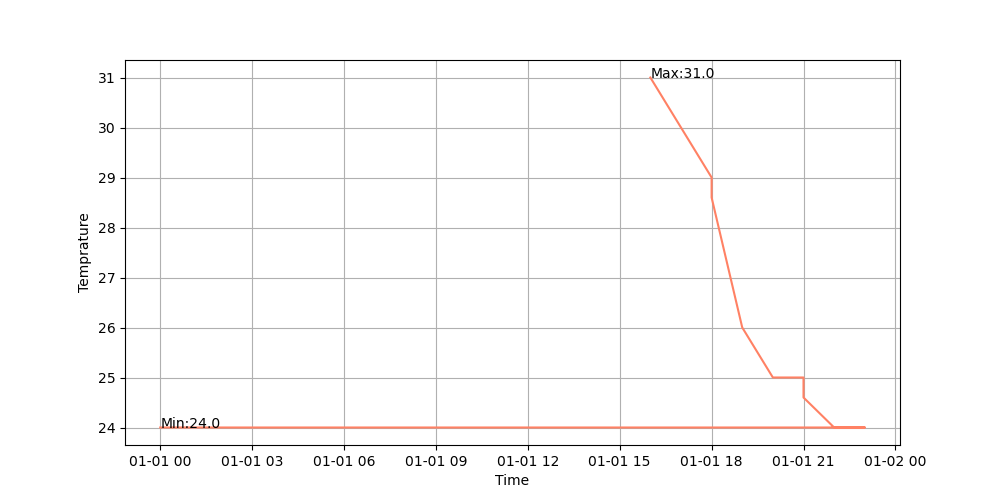

In [ ]:
%matplotlib notebook
consumer = connect_kafka_consumer()
consume_messages_and_plot(consumer)